### Using Naive Bayes

In [6]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold

### Load the data from pickle files

In [2]:
# Dataframe
with open('../Pickles/Content_Parsed.pickle', 'rb') as data:
    content_parsed = pickle.load(data)

# features_train
with open('../Pickles/features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)

# labels_train
with open('../Pickles/labels_train.pickle', 'rb') as data:
    labels_train = pickle.load(data)

# features_test
with open('../Pickles/features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)

# labels_test
with open('../Pickles/labels_test.pickle', 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
#Create a NB Classifier
clf = MultinomialNB()

#Train the model using the training sets
clf.fit(features_train, labels_train)

#Predict the response for test dataset
labels_pred = clf.predict(features_test)


In [4]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(labels_test, labels_pred))

Accuracy: 0.6179104477611941


In [7]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(labels_test, labels_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(labels_test, labels_pred, average='micro'))

Precision: 0.6179104477611941
Recall: 0.6179104477611941


### Hyperparameters
We will try to improve the accuracy using hyperparameters tuning

In [10]:
nb = MultinomialNB()
print('Parameters currently in use:\n')
nb.get_params()

Parameters currently in use:



{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

### Randomized Search cross validation

In [33]:

param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}
# Definition of the random search
random_search = RandomizedSearchCV(estimator=nb,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=3)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1]},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [34]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'alpha': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.6716492277030394


### Grid search cross validation 


In [35]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 3)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=nb, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=3, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [36]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'alpha': 0.001}

The mean accuracy of a model with these hyperparameters is:
0.665158371040724


In [37]:
best_nb_model = random_search.best_estimator_
best_nb_model

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

### Fitting the model and predicting 


In [38]:
# Fit the model with training data
best_nb_model.fit(features_train, labels_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [39]:
# Predict the value for test data
nb_pred = best_nb_model.predict(features_test)

In [40]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_nb_model.predict(features_train)))

The training accuracy is: 
0.6900847035376183


In [41]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, nb_pred))

The test accuracy is: 
0.6492537313432836


In [42]:
# Classification report
print("Classification report")
print(classification_report(labels_test, nb_pred))

Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.88      0.18      0.30        39
           3       0.59      0.23      0.33        75
           4       0.80      0.35      0.48        81
           5       0.64      0.97      0.77       387
           6       1.00      0.09      0.16        23
           7       0.00      0.00      0.00         2
           8       0.64      0.54      0.58        13

    accuracy                           0.65       670
   macro avg       0.57      0.29      0.33       670
weighted avg       0.63      0.65      0.57       670



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix 

In [43]:
conf_matrix = confusion_matrix(labels_test, nb_pred)
conf_matrix

array([[  0,   1,   0,   0,  49,   0,   0,   0],
       [  0,   7,   0,   0,  32,   0,   0,   0],
       [  0,   0,  17,   5,  53,   0,   0,   0],
       [  0,   0,   5,  28,  48,   0,   0,   0],
       [  0,   0,   7,   2, 374,   0,   0,   4],
       [  0,   0,   0,   0,  21,   2,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   6,   0,   0,   7]])

In [44]:
category_codes = {'1' : 'Service Proxy troubleshooting / APIGW', 
          '2' : 'Onboarding generic queries',
          '3' : 'Assessment/rescore queries/early spec/exception requests',
          '4' : 'Access to Tool queries', 
          '5' : 'API Standards queries',
         # 'Redirecting queries to other teams' : '9', 
         # 'Redirect to us' : '10', 
          '6' : 'zally',
          '7' : 'Client libs', 
          '8' : 'Jamstack content reviewer'}
# Passing the categories was a mess so created another df specifically for categories
df2 = pd.DataFrame({})
df2["Category"] = content_parsed["Category"]
df2["Category_code"] = content_parsed["Category"]
df2 = df2.replace({'Category_code':category_codes})
label = df2.sort_values(by=['Category']).drop_duplicates()
label

,Category,Category_code
0,1,Service Proxy troubleshooting / APIGW
357,2,Onboarding generic queries
992,3,Assessment/rescore queries/early spec/exceptio...
1192,4,Access to Tool queries
402,5,API Standards queries
1010,6,zally
636,7,Client libs
679,8,Jamstack content reviewer


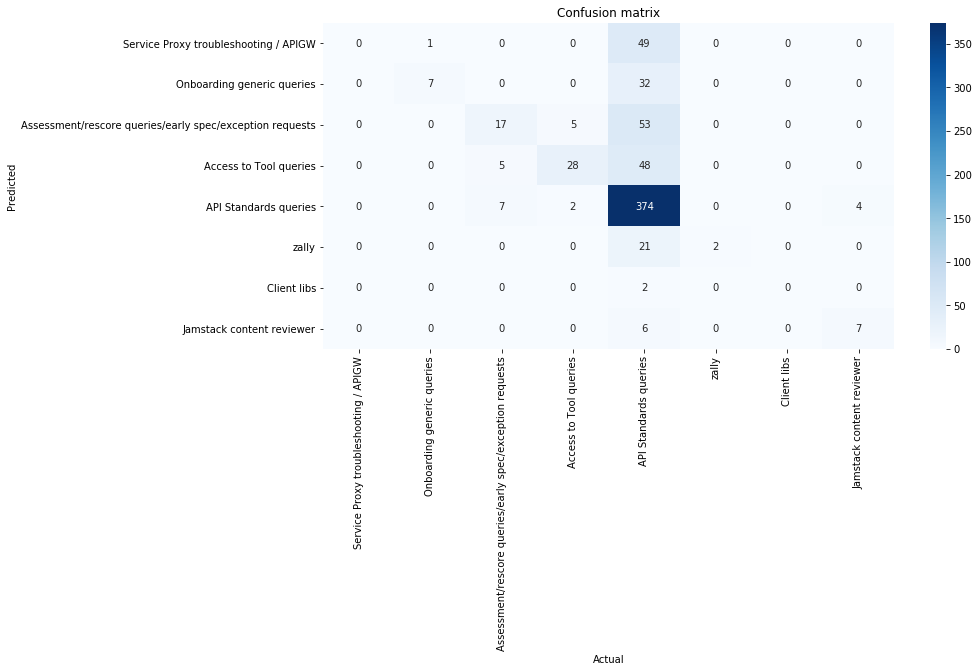

In [45]:
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=label.Category_code, 
            yticklabels=label.Category_code,
            fmt='g',
            cmap="Blues"
            )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [46]:
# We'll create a dataset with a model summary to compare models:
d = {
     'Model': 'NB',
     'Training Set Accuracy': accuracy_score(labels_train, best_nb_model.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, nb_pred)
}

df_models_nb = pd.DataFrame(d, index=[0])

In [47]:
df_models_nb

,Model,Training Set Accuracy,Test Set Accuracy
0,NB,0.690085,0.649254


In [48]:
with open('Models/best_nb.pickle', 'wb') as output:
    pickle.dump(best_nb_model, output)
    
with open('Models/df_models_nb.pickle', 'wb') as output:
    pickle.dump(df_models_nb, output)